In [323]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
dt = 1e-3
k = 8.988e9

In [324]:

class Vector:
    def __init__(self, x, y, z):
        self.vector = np.array([x, y, z], dtype=float)

    def __str__(self):
        return f"Vector({self.x}, {self.y}, {self.z})"

    def __repr__(self):
        return f"Vector({self.x}, {self.y}, {self.z})"

    @property
    def x(self):
        return self.vector[0]

    @property
    def y(self):
        return self.vector[1]

    @property
    def z(self):
        return self.vector[2]

    def __add__(self, other):
        if not isinstance(other, Vector):
            raise ValueError("The 'other' object must be a Vector")
        result_vector = self.vector + other.vector
        return Vector(*result_vector)

    def __sub__(self, other):
        if not isinstance(other, Vector):
            raise ValueError("The 'other' object must be a Vector")
        result_vector = self.vector - other.vector
        return Vector(*result_vector)

    def __mul__(self, scalar):
        result_vector = self.vector * scalar
        return Vector(*result_vector)

    def dot_product(self, other):
        if not isinstance(other, Vector):
            raise ValueError("The 'other' object must be a Vector")
        result = np.dot(self.vector, other.vector)
        return result

    def cross_product(self, other):
        if not isinstance(other, Vector):
            raise ValueError("The 'other' object must be a Vector")
        result_vector = np.cross(self.vector, other.vector)
        return Vector(*result_vector)

    def mod(self):
        return np.linalg.norm(self.vector)

    def dist(self, other):
        if not isinstance(other, Vector):
            raise ValueError("The 'other' object must be a Vector")
        diff = self.vector - other.vector
        return np.linalg.norm(diff)


In [325]:
class Particle:
    def __init__ (self,mass,charge,pos,vel):
        self.mass = mass
        self.charge = charge
        self.pos = pos
        self.vel = vel
    
    def __str__ (self):
        return f"Particle \n Mass: {self.mass} \n Charge : {self.charge}\n Position {self.pos}\n Velocity {self.vel}"

    def __repr__ (self):
        return f"Particle \n Mass: {self.mass} \n Charge : {self.charge}\n Position {self.pos}\n Velocity {self.vel}"
    
    def update(self,tot_acc):
        self.vel += tot_acc*dt
        self.pos += self.vel*dt

In [326]:
def Lorentz (particle, E, B):
    E_force = E
    B_force = particle.vel.cross_product(B)
    tot_for = (E_force + B_force)
    tot_acc = tot_for*(particle.charge/particle.mass)
    return tot_acc

In [327]:
def Coulumb_i(par1,par2):
    r = par1.pos.dist(par2.pos)
    force = k * abs(par1.charge * par2.charge) / (r ** 3)
    # print(force)
    r_vec =par1.pos - par2.pos
    f_vec = r_vec*force
    return Vector(0,0,0)
    # return f_vec

In [328]:
mass = 2e-3
charge = 2e-3
pos = Vector(0.0 ,0.0 ,0.0)
vel = Vector(10.0 ,0.0 ,0.0)
par1 = Particle(mass,charge,pos,vel)
par1

Particle 
 Mass: 0.002 
 Charge : 0.002
 Position Vector(0.0, 0.0, 0.0)
 Velocity Vector(10.0, 0.0, 0.0)

In [329]:
mass = 2e-3
charge = 2e-3
pos = Vector(10.0 ,0.0 ,0.0)
vel = Vector(0.0 ,0.0 ,0.0)
par2 = Particle(mass,charge,pos,vel)
par2

Particle 
 Mass: 0.002 
 Charge : 0.002
 Position Vector(10.0, 0.0, 0.0)
 Velocity Vector(0.0, 0.0, 0.0)

In [330]:
E = Vector(0.0 ,0.0 ,1.0)
B = Vector(0.0 ,1.0 ,0.0)

In [331]:
coul1 = Coulumb_i(par1,par2)
coul1

Vector(0.0, 0.0, 0.0)

In [332]:
coul2 = Coulumb_i(par2,par1)
coul2

Vector(0.0, 0.0, 0.0)

Calculating the accelaration 

In [333]:
acc1 = Lorentz(par1,E,B) + coul1
x_positions = []
y_positions = []
z_positions = []
v = []

In [334]:
acc2 = Lorentz(par2,E,B) + coul2
x1_positions = []
y1_positions = []
z1_positions = []

Radius of Rotation

In [335]:
# r= mv/qb
ri = (par1.mass*par1.vel.mod())/(par1.charge*B.mod())
ti = 2*np.pi*ri/par1.vel.mod()
print("Time is :",  ti)
ri

Time is : 6.283185307179586


10.0

In [336]:
acc1

Vector(0.0, 0.0, 11.0)

In [337]:
acc2

Vector(0.0, 0.0, 1.0)

In [338]:
total_time = 40
n = int(total_time/dt)
for i in range(n):
    par1.update(acc1)
    par2.update(acc2)
    acc1 = Lorentz(par1,E,B) + Coulumb_i(par1,par2)
    acc2 = Lorentz(par2,E,B) + Coulumb_i(par2,par1)
    tri = par1.pos.dist(par2.pos)
    if tri < 5:
        print("they touched",par1.pos,par2.pos)

    x_positions.append(par1.pos.x)
    y_positions.append(par1.pos.y)
    z_positions.append(par1.pos.z)
    x1_positions.append(par2.pos.x)
    y1_positions.append(par2.pos.y)
    z1_positions.append(par2.pos.z)
    v.append(par1.vel.mod())

 


they touched Vector(5.199519494046472, 0.0, 1.6254011020955532) Vector(9.972683590367856, 0.0, 0.14776373655414105)
they touched Vector(5.207894092944376, 0.0, 1.6311616215895997) Vector(9.972535826631301, 0.0, 0.1482874201445089)
they touched Vector(5.216262931322786, 0.0, 1.6369315156825441) Vector(9.972387539211157, 0.0, 0.14881195597114022)
they touched Vector(5.224625999807104, 0.0, 1.6427107786138668) Vector(9.972238727255187, 0.0, 0.14933734351035138)
they touched Vector(5.232983289028491, 0.0, 1.6484994046136738) Vector(9.972089389911677, 0.0, 0.14986358223760657)
they touched Vector(5.2413347896238776, 0.0, 1.6542973879027023) Vector(9.97193952632944, 0.0, 0.15039067162751824)
they touched Vector(5.249680492235975, 0.0, 1.6601047226923262) Vector(9.971789135657811, 0.0, 0.15091861115384766)
they touched Vector(5.258020387513283, 0.0, 1.6659214031845622) Vector(9.971638217046658, 0.0, 0.15144740028950548)
they touched Vector(5.266354466110099, 0.0, 1.6717474235720755) Vector(9.

In [339]:
# v

In [340]:
rf = (par1.mass*par1.vel.mod())/(par1.charge*B.mod())
tf = 2*np.pi*rf/par1.vel.mod()
print("Time is :",  tf)
rf


Time is : 6.283185307179587


11.912469194858115

In [341]:
acc1

Vector(-8.361919601924965, 0.0, -7.484410579962912)

In [342]:
par1

Particle 
 Mass: 0.002 
 Charge : 0.002
 Position Vector(-31.656564808654533, 0.0, 18.492772499564673)
 Velocity Vector(-8.484410579962912, 0.0, 8.361919601924965)

In [343]:
par1.vel.mod()

11.912469194858115

In [344]:
par2

Particle 
 Mass: 0.002 
 Charge : 0.002
 Position Vector(-29.24150589169586, 0.0, 1.68116113632408)
 Velocity Vector(-1.6804009618148141, 0.0, 0.7601745092658939)

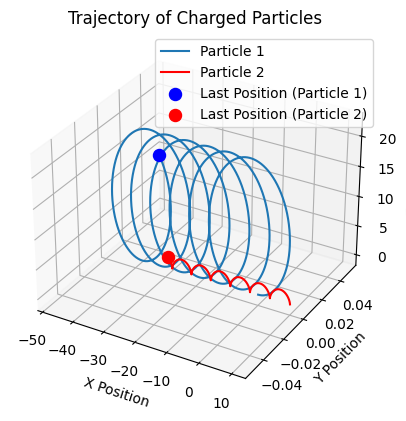

In [345]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x_positions, y_positions, z_positions, label='Particle 1')
ax.plot(x1_positions, y1_positions, z1_positions, color='red', label='Particle 2')


ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('Trajectory of Charged Particle')



last_x_position = x_positions[-1]
last_y_position = y_positions[-1]
last_z_position = z_positions[-1]

last_x1_position = x1_positions[-1]
last_y1_position = y1_positions[-1]
last_z1_position = z1_positions[-1]

ax.scatter(last_x_position, last_y_position, last_z_position, c='blue', marker='o', s=75, label='Last Position (Particle 1)')
ax.scatter(last_x1_position, last_y1_position, last_z1_position, c='red', marker='o', s=75, label='Last Position (Particle 2)')

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('Trajectory of Charged Particles')

# ax.view_init(elev=90, azim=0)
ax.legend()
plt.show()